In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
class Create_user:
    user_names = []
    def __init__(self, firstname, lastname, national_number, date_of_birth, account_balance=0):
        self.firstname = firstname
        self.lastname = lastname
        self.national_number = national_number
        self.date_of_birth = date_of_birth
        self.account_balance = account_balance
        if f"{firstname} {lastname}" in Create_user.user_names:
            print("Welcome back!")
        else:
            Create_user.user_names.append(f"{firstname} {lastname}")
            print("Welcome, new user!")

In [3]:
account = Create_user('John', 'Smith', '1234567890', '1990-01-01', 10000)

Welcome, new user!


In [19]:
class portfoloi:
    def __init__(self, data_file):
        self.df = pd.read_csv(data_file)
        self.shares = {}
    def buy_shares(self, company, date, quantity, user):
        desired_stock = self.df.loc[(self.df['Symbol'] == company) & (self.df['Date'] == date)]
        if desired_stock.empty:
            desired_stock =self.df.loc[self.df['Symbol'] == company]
            initial_value = desired_stock['Open'].iloc[-1]
            total_value = initial_value * quantity
            #print(total_value,user.account_balance)
            if user.account_balance >= total_value:
                user.account_balance -= total_value
                if company in self.shares:
                    self.shares[company] += total_value
                else:
                    self.shares[company] = total_value
            #print(f'{total_value} and {initial_value}')
                print(f'{user.firstname} {user.lastname} bought {quantity} shares of {company}')
            else:
                print(f"{user.firstname} {user.lastname} can't buy {quantity} shares of {company}")
        else:
            initial_value = desired_stock['Open'].iloc[0]
            total_value = initial_value * quantity
            if user.account_balance >= total_value:
                user.account_balance -= total_value
                #print(total_value,user.account_balance)
                if company in self.shares:
                    self.shares[company] += total_value
                else:
                    self.shares[company] = total_value
            #print(f'{total_value} and {initial_value}')
                print(f'{user.firstname} {user.lastname} bought {quantity} shares of {company}')
            else:
                print(f"{user.firstname} {user.lastname} can't buy {quantity} shares of {company}")

    def sell_shares(self, company, date, quantity, user):
        if company in self.shares:
            desired_stock =self.df.loc[(self.df['Symbol'] == company) & (self.df['Date'] == date)]
            if desired_stock.empty:
                desired_stock =self.df.loc[self.df['Symbol'] == company]
                initial_value = desired_stock['Open'].iloc[-1]
                total_value = initial_value * quantity
                if self.shares[company] >= total_value:
                    self.shares[company] -= total_value
                    user.account_balance += total_value
                    print(f'{user.firstname} {user.lastname} sold {quantity} shares of {company}')
                else:
                    print(f"{user.firstname} {user.lastname} doesn't have anough quantity of {company}")
            else:
                initial_value = desired_stock['Open'].iloc[0]
                total_value = initial_value * quantity
                if self.shares[company] >= total_value:
                    self.shares[company] -= total_value
                    user.account_balance += total_value
                    print(f'{user.firstname} {user.lastname} sold {quantity} shares of {company}')
                else:
                    print(f"{user.firstname} {user.lastname} doesn't have anough quantity of {company}")
        else:
            print(f"{user.firstname} {user.lastname} doesn't have shares of {company}")
    
    def available_shares(self):
        List_of_price_changes= []
        for company in ['AAPL', 'TSLA', 'FB', 'GOOGL','AMZN']:
            desired_stock = self.df.loc[self.df['Symbol'] == company]
            first_value = desired_stock['Open'].iloc[0]
            last_value = desired_stock['Open'].iloc[-1]
            Price_change = ((last_value - first_value)/first_value)* 100
            List_of_price_changes.append((company,Price_change))
        sorted_List = sorted(List_of_price_changes, key=lambda x: x[1], reverse = True)
        print(sorted_List)
        
    def purchased_shares(self):
        print(self.shares)

    def display_price_change(self,company):
        desired_stock = self.df.loc[self.df['Symbol'] == company]
        plt.plot(desired_stock['Open'])
        plt.xlabel('order of investment')
        plt.ylabel('Stock price')
        plt.title(f'{company} Price Change Plot')
        plt.show()
    
    def general_price_change_trend(self,company):
        company_data = self.df[self.df['Symbol'] == company]
        x = company_data.index
        y = company_data['Open']
        sns.regplot(x=x, y=y)
        plt.title(f"Price Change Trend for {company}")
        plt.xlabel("Date")
        plt.ylabel("Value at Beginning")
        plt.show()

In [20]:
stock = portfoloi('stock_market_data.csv')

In [21]:
stock.buy_shares('AAPL',"2003-01-11",8,account)

John Smith bought 8 shares of AAPL


In [22]:
stock.buy_shares('AMZN',"2007-10-05",5,account)

John Smith can't buy 5 shares of AMZN


In [23]:
stock.sell_shares('AAPL',"2007-10-17",3,account)

John Smith sold 3 shares of AAPL


In [24]:
stock.buy_shares('FB',"2010-12-05",2,account)

John Smith bought 2 shares of FB


In [25]:
stock.available_shares()

[('TSLA', 20254.736583543283), ('AAPL', 1796.8841905319312), ('AMZN', 1501.012758027523), ('GOOGL', 630.0005611622613), ('FB', 357.97860957230483)]


In [26]:
stock.purchased_shares()

{'AAPL': 722.9499816894531, 'FB': 385.1600036621094}


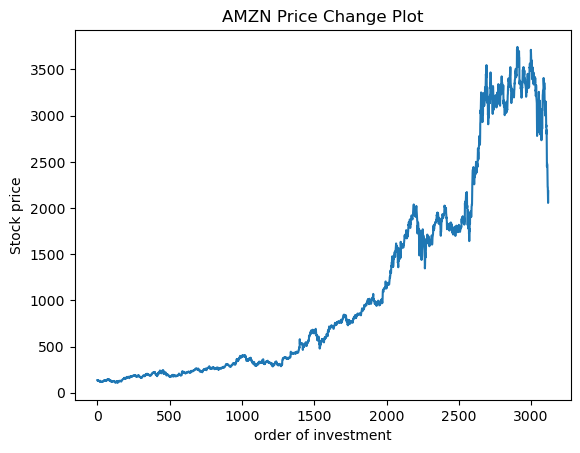

In [27]:
stock.display_price_change('AMZN')

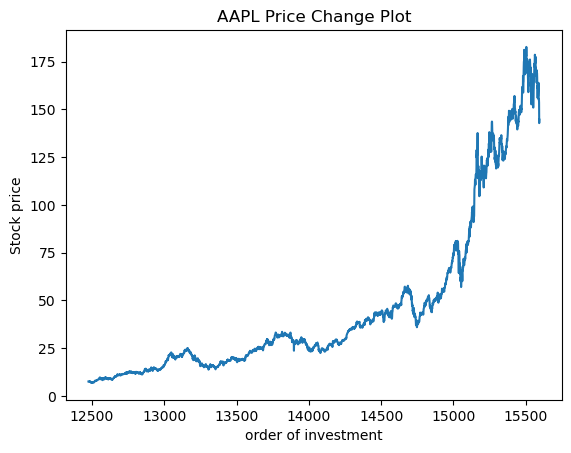

In [28]:
stock.display_price_change('AAPL')

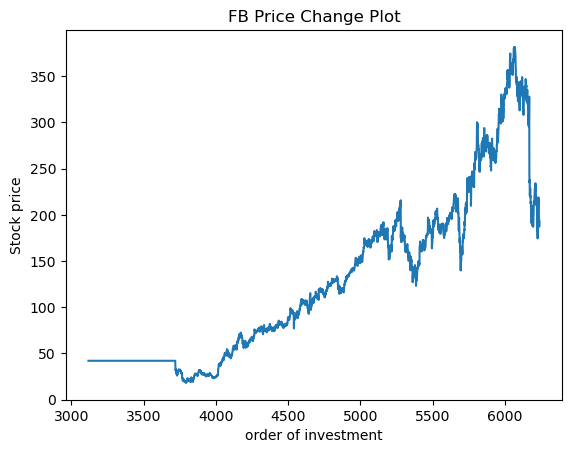

In [29]:
stock.display_price_change('FB')

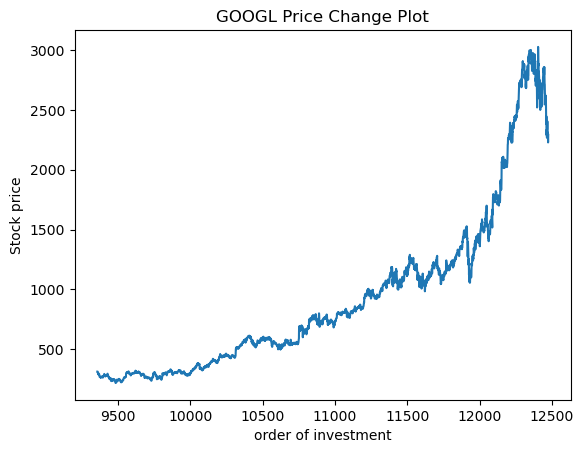

In [30]:
stock.display_price_change('GOOGL')

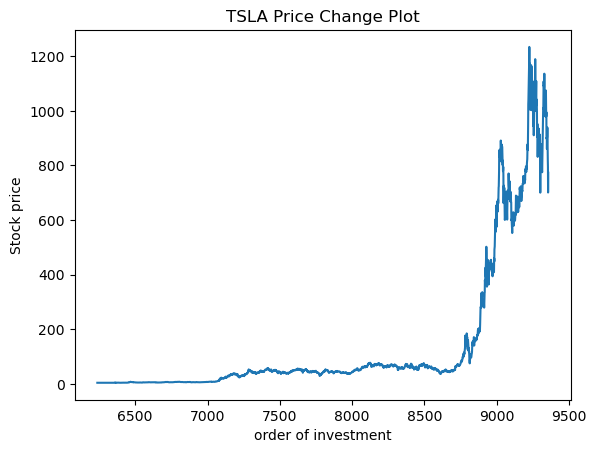

In [31]:
stock.display_price_change('TSLA')

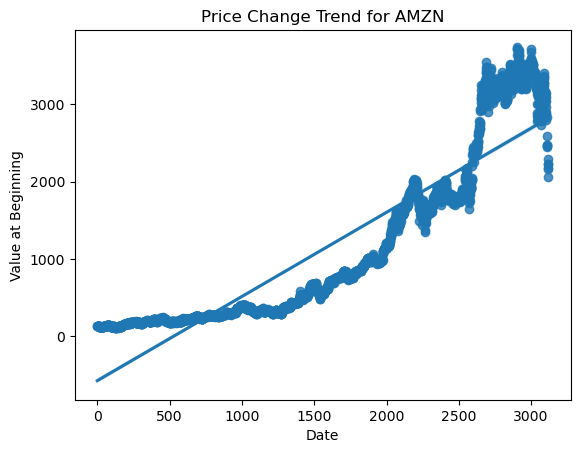

In [32]:
stock.general_price_change_trend('AMZN')

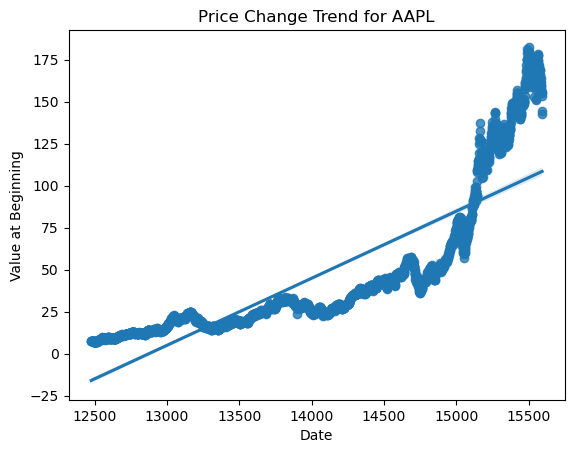

In [33]:
stock.general_price_change_trend('AAPL')

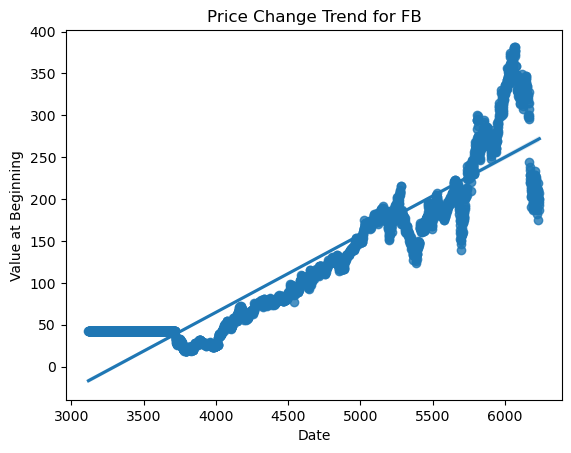

In [34]:
stock.general_price_change_trend('FB')

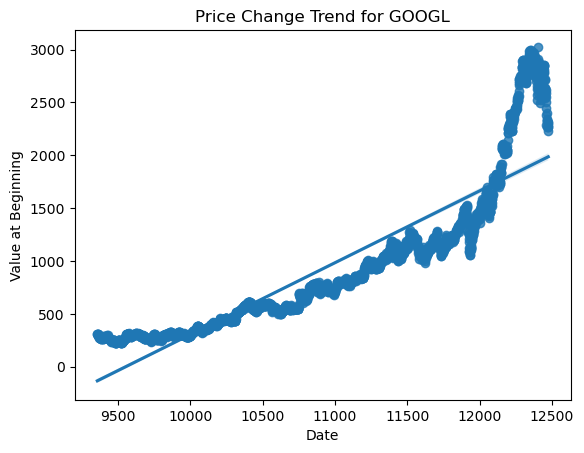

In [35]:
stock.general_price_change_trend('GOOGL')

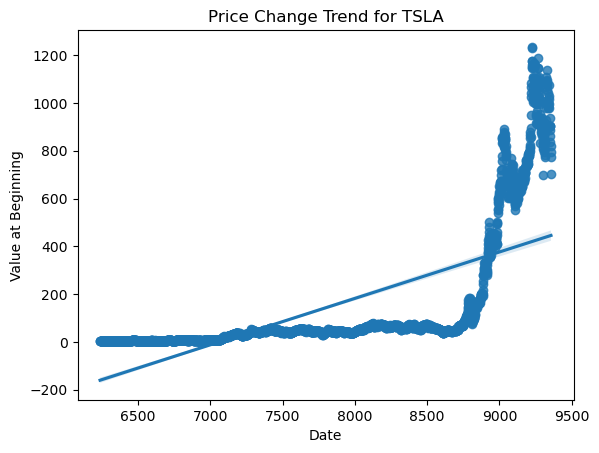

In [36]:
stock.general_price_change_trend('TSLA')

In [37]:
df = pd.read_csv('stock_market_data.csv')
df = df.set_index('Date')
df

,Symbol,Open,Volume
Date,,,
2009-12-31,AMZN,136.250000,7599900.0
2010-01-04,AMZN,136.250000,7599900.0
2010-01-05,AMZN,133.429993,8851900.0
2010-01-06,AMZN,134.600006,7178800.0
2010-01-07,AMZN,132.009995,11030200.0
...,...,...,...
2022-05-09,AAPL,154.929993,131577900.0
2022-05-10,AAPL,155.520004,115366700.0
2022-05-11,AAPL,153.500000,142689800.0
